##Operatins Research Applications & Algorithms
##Chapter 3.8, Example (10)
**Sunco Oil manufactures three types of gasoline (gas 1, gas 2, and gas 3).**

**Section 4_ Wednesday**


##Parametrs Definition
* $I$: The set of crude oils used to produce different gasoline types , \{1, 2,3\}
* $J$: The three different gasoline types , \{"Gas_1", "Gas_2","Gas_3"\}
* $S_j \equiv $  Selling price in (\$) for one barrel for each gas type  $j$, $j\in J$.
* $C_i \equiv $  The cost per barrel in dollars for each component  $i$, $i\in I$.
* $A_i \equiv $ The maximum available amount of each component $i$ measured in Barrels per day , $i\in I$.
* $O_i \equiv $ The octane rating for each crude oil $i$ , $i\in I$.
* $U_i \equiv $ The percent sulfur content for each crude oil $i$ , $i\in I$.
* $OC_j \equiv $ The minimum octane rating required for each gas type $j$ , $j\in J$.
* $UL_j \equiv $ The maximum percent of sulfur content for each required for each gas type $j$ , $j\in J$.
* $D_j \equiv $ Demand of Sunco's customers in barrels per day for each type of gas $j$, $j\in J$.
* $P \equiv $ The constant production cost that is equivalent to \$4 to transform one barrel of oil into one barrel of gas.
* $M \equiv $ The maximum production capacity of Sunco's refinery that is equivalent to 14000 barrels of gasoline per day.


##Decision Variables
\begin{align*}
    x_{ij} & \equiv \text {Barrels of component (crude oil) $i$ used to produce gas type $j$ per day } i \in I, j \in J\\
    y_j & \equiv \text {The amount of \$ spent daily on advertising gas type $j$} ,j \in J\\
\end{align*}

##Linear Programme
\begin{align*}
    \max \hspace{10pt} & \sum_{i \in I}\sum_{j\in J} x_{ij}S_{j} -\sum_{i \in I}\sum_{j\in J} x_{ij}c_{i} - \sum_{j \in J} y_j -P\sum_{i \in I}\sum_{j\in J} x_{ij}\\\\
    \text{s.t.} \hspace{7pt}
    & \frac{\sum_{i \in I} O_i x_{ij}}{\sum_{i \in I}x_{ij}} \ge OC_j & \forall {j \in J}\\ \\
    & \frac{\sum_{i \in I} U_i x_{ij}}{\sum_{i \in I}x_{ij}} \le UL_j & \forall {j \in J}\\ \\
    & \sum_{j\in J}x_{ij}\le  A_i & \forall i \in I\\
    & \sum_{i \in I}x_{ij} =  D_j+ 10(y_j)& \forall j \in J\\
    & \sum_{i \in I}\sum_{j \in J}x_{ij}\le  M \\
    & x_{ij}\ge 0 & \forall i \in I , \forall j \in J\\
  \end{align*}

In [ ]:
# To call optimization library
!pip install cplex
!pip install docplex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43.3 MB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 610 kB 19.6 MB/s 
  Created wheel for docplex: filename=docplex-2.23.222-py3-none-any.whl size=662847 sha256=40c15e34ada0655e5249eefce6a2cc78e2fe91aac11791a3c3afb137ebaad1e5
  Stored in directory: /root/.cache/pip/wheels/a7/c9/fb/cee5a89f304e77a39c466e625ac2830434b76eb8384999d116
Successfully built docplex


In [ ]:
# First impot the Model class from docplex.mp
from docplex.mp.model import Model

In [ ]:
# Create one model instance, with a name
m = Model (name="Sunco_Oil_Blending")

In [ ]:
#All_Related_To_Components ={Component No: ["Maximum Barrels Available/Day","Cost/Barrel","Octane Rating","% Sulfur Content"]}
All_Related_To_Components = {'Crude_1':[5000,45,12,0.5],
                             'Crude_2':[5000,35, 6,2.0],
                             'Crude_3':[5000,25, 8,3.0]}
#Gas ={"Gas_Type":["Demand","Selling Price/Barrel","Min_Octane Rating","Max_Sulfur Content"]}
Gas= {"Gas_1":[3000,70,10,1],
      "Gas_2":[2000,60, 8,2],
      "Gas_3":[1000,50, 6,1]}

Prod_Cost = 4
Sunco_Capacity = 14000

#All_Related_To_Components[i for i in All_Related_To_Components.keys() ]

In [ ]:
# Defining the decision variables
Amount_in_Blend = {(i,j):m.continuous_var(lb=0,ub=None,name= 'Amount of component type {0} in oil type {1}'.format(i,j)) for i in All_Related_To_Components.keys() for j in Gas.keys()}
Adv_Gas = m.continuous_var_dict(Gas.keys(),lb = 0, ub = None , name = 'Dollars spent on advertising %s')

In [ ]:
# Defining the objective function
Total_Revenue = m.sum(Gas[j][1]*Amount_in_Blend[(i,j)]for i in All_Related_To_Components.keys() for j in Gas.keys())
Total_Oils_Cost = m.sum(Amount_in_Blend[(i,j)]*All_Related_To_Components[i][1]for i in All_Related_To_Components.keys() for j in Gas.keys())
Total_Advertising_Cost = m.sum(Adv_Gas[j] for j in Gas.keys())
Total_Production_Cost = m.sum(Prod_Cost*Amount_in_Blend[(i,j)]for i in All_Related_To_Components.keys() for j in Gas.keys())
Net_Profit = Total_Revenue-Total_Oils_Cost-Total_Advertising_Cost-Total_Production_Cost
m.maximize(Net_Profit)


In [ ]:
# Defining the constraints
# Demand Constraints
for j in Gas.keys():
  m.add_constraint_(m.sum(Amount_in_Blend[(i,j)]for i in All_Related_To_Components.keys())== Gas[j][0]+10*Adv_Gas[j] )

# Not to exceed the availability of the components
for i in All_Related_To_Components.keys():
  m.add_constraint_(m.sum(Amount_in_Blend [(i,j)] for j in Gas.keys())<= All_Related_To_Components[i][0] )

# Not to exceed Sunco' totol production capacity
m.add_constraint_(m.sum(Amount_in_Blend [(i,j)] for i in All_Related_To_Components.keys() for j in Gas.keys())<= Sunco_Capacity)

# Octane level blending constraints
for j in Gas.keys():
  m.add_constraint_(m.sum(Amount_in_Blend[(i,j)]* All_Related_To_Components[i][2]for i in All_Related_To_Components.keys())>= m.sum(Amount_in_Blend[(i,j)]* Gas[j][2]for i in All_Related_To_Components.keys()) )

# Sulfur level blending constraints
for j in Gas.keys():
  m.add_constraint_(m.sum(Amount_in_Blend[(i,j)]* All_Related_To_Components[i][3] *(1/100)for i in All_Related_To_Components.keys())<= m.sum(Amount_in_Blend[(i,j)]* Gas[j][3]*(1/100) for i in All_Related_To_Components.keys()))


In [ ]:
m.print_information()
m.solve()
print(m.solve_status)
m.print_solution()


Model: Sunco_Oil_Blending
 - number of variables: 12
   - binary=0, integer=0, continuous=12
 - number of constraints: 13
   - linear=13
 - parameters: defaults
 - objective: maximize
 - problem type is: LP
JobSolveStatus.OPTIMAL_SOLUTION
objective: 287750.000
  "Amount of component type Crude_1 in oil type Gas_1"=2088.889
  "Amount of component type Crude_1 in oil type Gas_2"=2111.111
  "Amount of component type Crude_1 in oil type Gas_3"=800.000
  "Amount of component type Crude_2 in oil type Gas_1"=777.778
  "Amount of component type Crude_2 in oil type Gas_2"=4222.222
  "Amount of component type Crude_3 in oil type Gas_1"=133.333
  "Amount of component type Crude_3 in oil type Gas_2"=3166.667
  "Amount of component type Crude_3 in oil type Gas_3"=200.000
  "Dollars spent on advertising Gas_2"=750.000


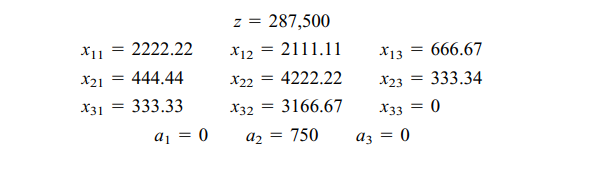